# Phase 1: Dataset Selection and Preprocessing

## method 1 to access the dataset -- fetch online data from UCI Machine Learning Repository

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
  
# variable information 
print(credit_approval.variables) 

   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [5]:
print(credit_approval.data)

{'ids': None, 'features':      A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[690 rows x 15 columns], 'targets':     A16
0     +
1     +
2     +
3     +
4     +
.

## method 2 to access the datasets -- download on my own computer

In [6]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
print(os.getcwd())

/Users/anqi/7275/project


In [8]:
import pandas as pd

df = pd.read_csv('/Users/anqi/7275/project/crx.data')
print(df.head())

   b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +


## variables information:
A1:	b, a.
A2:	continuous.
A3:	continuous.
A4:	u, y, l, t.
A5:	g, p, gg.
A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
A7:	v, h, bb, j, n, z, dd, ff, o.
A8:	continuous.
A9:	t, f.
A10:	t, f.
A11:	continuous.
A12:	t, f.
A13:	g, p, s.
A14:	continuous.
A15:	continuous.
A16: +,-         (class attribute)

In [9]:
import pandas as pd

# Assign column names for readability
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df.columns = column_names
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


## data cleaning

In [10]:
import numpy as np

# Replace '?' with NaN across the entire DataFrame
df.replace('?', np.nan, inplace=True)

# Check the number of missing values in each column
missing_values_count = df.isnull().sum()

print(missing_values_count)

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      677 non-null    object 
 1   A2      677 non-null    object 
 2   A3      689 non-null    float64
 3   A4      683 non-null    object 
 4   A5      683 non-null    object 
 5   A6      680 non-null    object 
 6   A7      680 non-null    object 
 7   A8      689 non-null    float64
 8   A9      689 non-null    object 
 9   A10     689 non-null    object 
 10  A11     689 non-null    int64  
 11  A12     689 non-null    object 
 12  A13     689 non-null    object 
 13  A14     676 non-null    object 
 14  A15     689 non-null    int64  
 15  A16     689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [12]:
# beacaus A2 seems like the folat, but A14 has leading zeros, so we change data type to numerical values in A2
df['A2'] = pd.to_numeric(df['A2'], errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      677 non-null    object 
 1   A2      677 non-null    float64
 2   A3      689 non-null    float64
 3   A4      683 non-null    object 
 4   A5      683 non-null    object 
 5   A6      680 non-null    object 
 6   A7      680 non-null    object 
 7   A8      689 non-null    float64
 8   A9      689 non-null    object 
 9   A10     689 non-null    object 
 10  A11     689 non-null    int64  
 11  A12     689 non-null    object 
 12  A13     689 non-null    object 
 13  A14     676 non-null    object 
 14  A15     689 non-null    int64  
 15  A16     689 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.3+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [13]:
# For continuous variables, impute missing values with the median
continuous_cols = ['A2', 'A3', 'A8', 'A11', 'A15']
df[continuous_cols] = df[continuous_cols].apply(lambda x: x.fillna(x.median()), axis=0)

# For categorical variables, impute missing values with the mode
categorical_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14', 'A16'] # we define A14 as string
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# recheck the missing values
print(df.isnull().sum())

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64


## Encode for catergorial values

In [14]:
# transfer catergorial values to numbers (for varibale A1, A4, A5, A6, A7, A9, A10, A12, A13 and A16)

#from sklearn.preprocessing import LabelEncoder

# Loop through each categorical column
for column in categorical_cols:
    # Get the unique categories for the column
    categories = df[column].unique()
    # Create a mapping from categories to numbers
    mapping = {category: idx for idx, category in enumerate(categories, start=1)}
    # Apply the mapping to the column
    df[column] = df[column].map(mapping)

# categorical_encoded = df[categorical_cols].apply(LabelEncoder().fit_transform)

# Now the original categorical columns are replaced with the encoded numbers
print(df.head())

# '1' is '+' in A16

   A1     A2     A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13  A14  A15  \
0   1  58.67  4.460   1   1   1   1  3.04   1    1    6    1    1    1  560   
1   1  24.50  0.500   1   1   1   1  1.50   1    2    0    1    1    2  824   
2   2  27.83  1.540   1   1   2   2  3.75   1    1    5    2    1    3    3   
3   2  20.17  5.625   1   1   2   2  1.71   1    2    0    1    2    4    0   
4   2  32.08  4.000   1   1   3   2  2.50   1    2    0    2    1    5    0   

   A16  
0    1  
1    1  
2    1  
3    1  
4    1  


In [58]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,2.005968,0.2736,1,1,1,1,0.829268,1,1,2.000000,1,1,1,1.401515,1
1,1,-0.259947,-0.3600,1,1,1,1,0.203252,1,2,0.000000,1,1,2,2.068182,1
2,2,-0.039125,-0.1936,1,1,2,2,1.117886,1,1,1.666667,2,1,3,-0.005051,1
3,2,-0.547082,0.4600,1,1,2,2,0.288618,1,2,0.000000,1,2,4,-0.012626,1
4,2,0.242706,0.2000,1,1,3,2,0.609756,1,2,0.000000,2,1,5,-0.012626,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2,-0.486737,1.1736,2,2,11,1,0.101626,2,2,0.000000,1,1,11,-0.012626,2
685,1,-0.381300,-0.3200,1,1,7,2,0.406504,2,1,0.666667,2,1,16,0.982323,2
686,1,-0.210212,1.7200,2,2,13,4,0.406504,2,1,0.333333,2,1,16,-0.010101,2
687,2,-0.696286,-0.4072,1,1,12,2,-0.390244,2,2,0.000000,1,1,2,1.881313,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      689 non-null    int64  
 1   A2      689 non-null    float64
 2   A3      689 non-null    float64
 3   A4      689 non-null    int64  
 4   A5      689 non-null    int64  
 5   A6      689 non-null    int64  
 6   A7      689 non-null    int64  
 7   A8      689 non-null    float64
 8   A9      689 non-null    int64  
 9   A10     689 non-null    int64  
 10  A11     689 non-null    int64  
 11  A12     689 non-null    int64  
 12  A13     689 non-null    int64  
 13  A14     689 non-null    int64  
 14  A15     689 non-null    int64  
 15  A16     689 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


## visualiza numerical values

In [16]:
df[continuous_cols].describe()

,A2,A3,A8,A11,A15
count,689.000000,689.000000,689.000000,689.000000,689.000000
mean,31.514412,4.765631,2.224819,2.402032,1018.862119
std,11.869013,4.978470,3.348739,4.866180,5213.743149
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000,0.000000
50%,28.420000,2.750000,1.000000,0.000000,5.000000
75%,37.750000,7.250000,2.625000,3.000000,396.000000
max,80.250000,28.000000,28.500000,67.000000,100000.000000


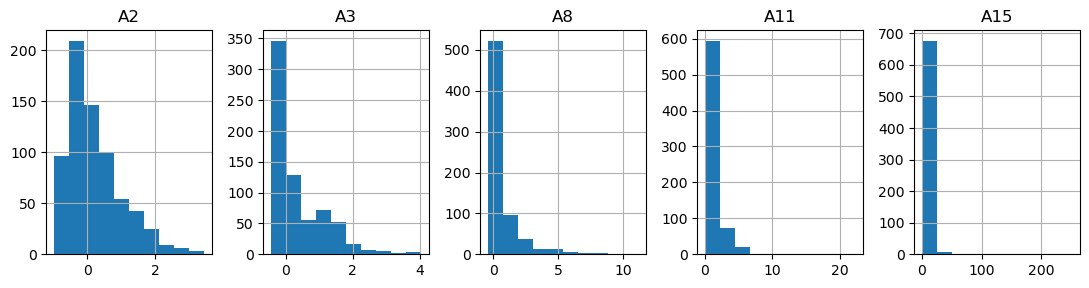

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each continuous column
df[continuous_cols].hist(figsize=(11, 8), layout=(3, 5))

# Show the plot
plt.tight_layout()
plt.show()

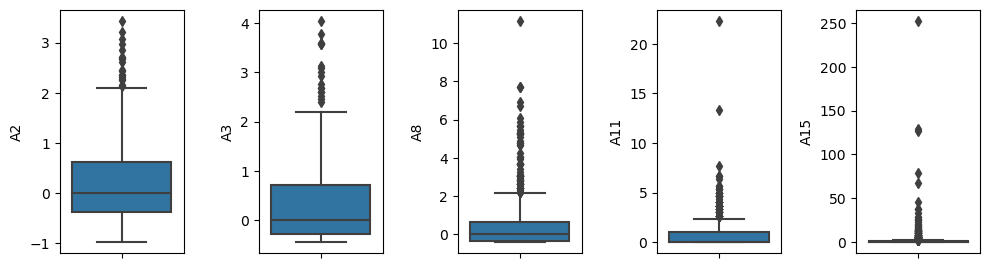

In [56]:
# Plot boxplots for each continuous column
plt.figure(figsize=(10, 8))

for i, col in enumerate(continuous_cols):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[col])

plt.tight_layout()
plt.show()

In [19]:
# since there are many outlier there, so we use robust scaling there

from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the data
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,2.005968,0.2736,1,1,1,1,0.829268,1,1,2.000000,1,1,1,1.401515,1
1,1,-0.259947,-0.3600,1,1,1,1,0.203252,1,2,0.000000,1,1,2,2.068182,1
2,2,-0.039125,-0.1936,1,1,2,2,1.117886,1,1,1.666667,2,1,3,-0.005051,1
3,2,-0.547082,0.4600,1,1,2,2,0.288618,1,2,0.000000,1,2,4,-0.012626,1
4,2,0.242706,0.2000,1,1,3,2,0.609756,1,2,0.000000,2,1,5,-0.012626,1


# Phase 2: Exploratory Data Analysis (EDA) and Feature Selection

## EDA

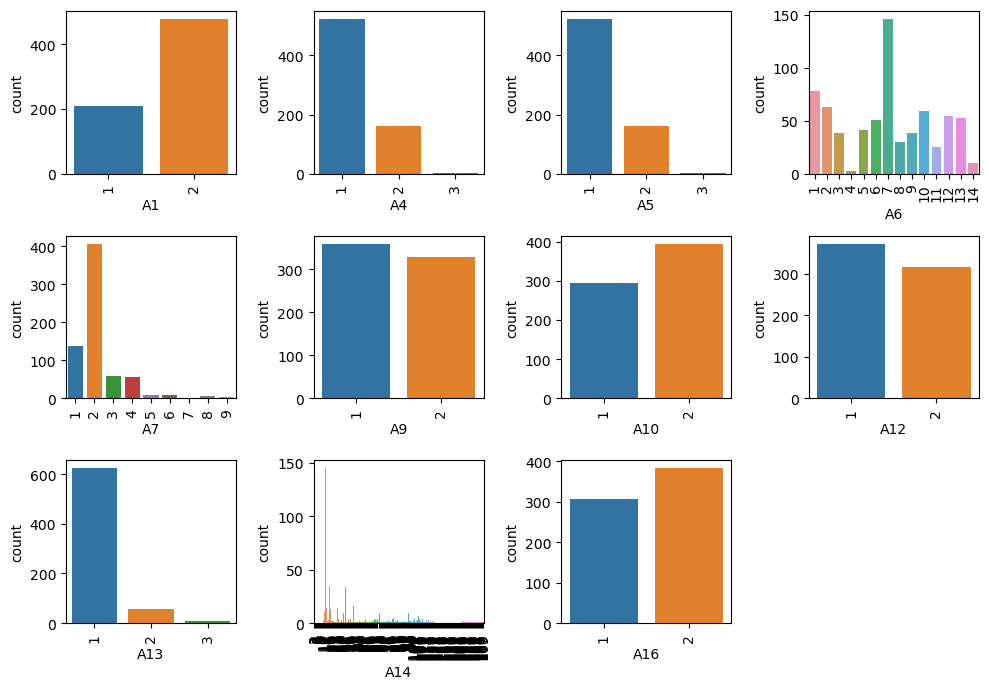

In [20]:
# Plot count plots for categorials
plt.figure(figsize=(10, 7))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i+1) 
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)  # Rotate overlap labels
plt.tight_layout()
plt.show()

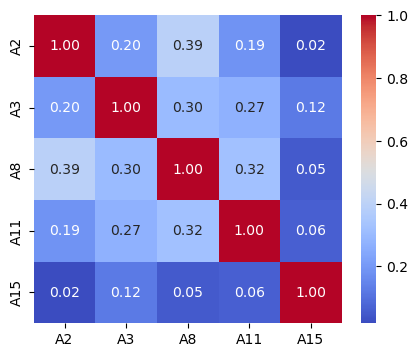

In [21]:
# correlation matrix for continuous
corr = df[continuous_cols].corr()

# Generate a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.show()
# seem like A8 is an important variables.

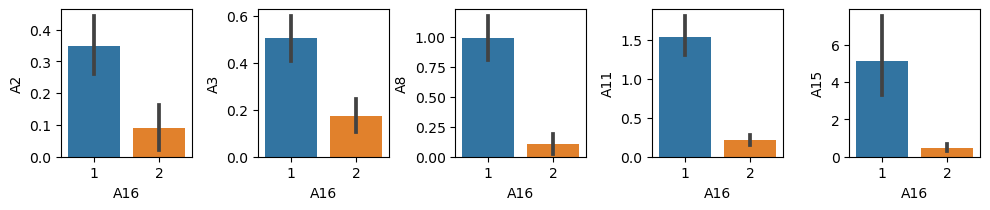

In [22]:
# Plot the mean of the numerical features for each class of the binary target
plt.figure(figsize=(10, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(5, 5, i+1) 
    sns.barplot(x=df['A16'], y=df[col])
plt.tight_layout()
plt.show()

## Features selection

##  1. Non-Model-Based Feature Importance Analysis:

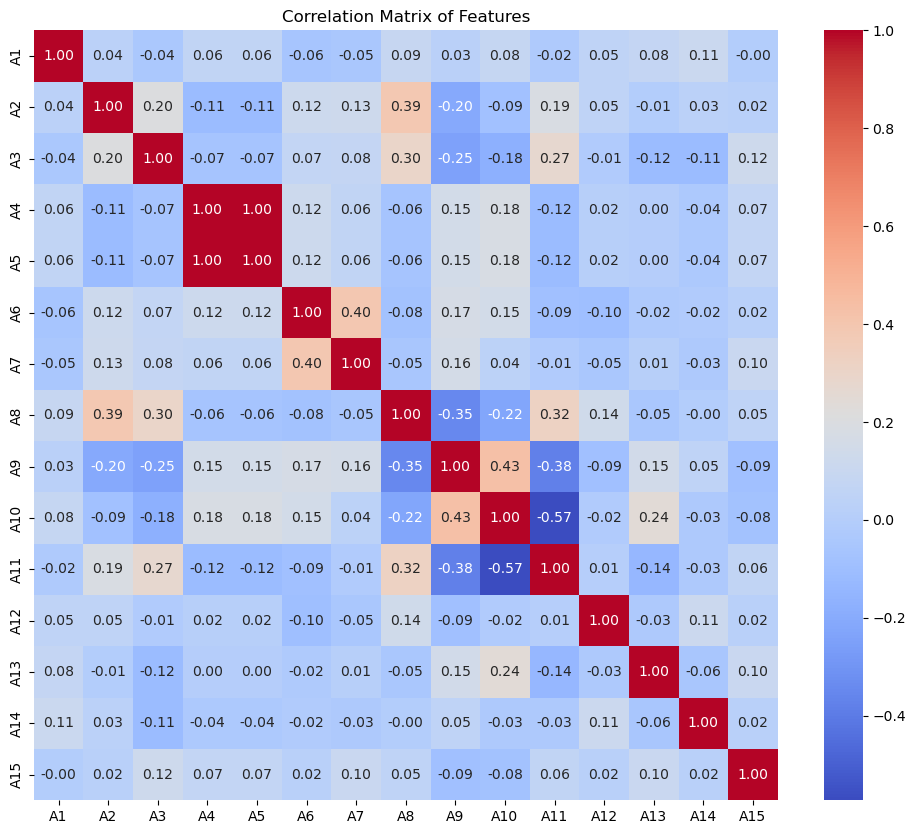

In [23]:
# 1.1 correlation matrix for all features in a heatmap 
import seaborn as sns
import matplotlib.pyplot as plt_

correlation_matrix = df.drop('A16', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# just for overview

In [24]:
# 1.2 Correlation Analysis for continuous features

from scipy.stats import pearsonr, spearmanr

pearson_correlations = {col: pearsonr(df[col], df['A16'])[0] for col in continuous_cols}
spearman_correlations = {col: spearmanr(df[col], df['A16'])[0] for col in continuous_cols}
print("pearson_correlations:", pearson_correlations)
print("spearman_correlations:", spearman_correlations)

# Calculate the absolute value of the correlation coefficients
abs_pearson = {feature: abs(pearson_correlations[feature]) for feature in pearson_correlations}
abs_spearman = {feature: abs(spearman_correlations[feature]) for feature in spearman_correlations}


# Average the Pearson and Spearman correlation coefficients
avg_correlations = {feature: (abs_pearson[feature] + abs_spearman[feature]) / 2 
                    for feature in abs_pearson}

# Convert the average correlations to a sorted list of tuples
sorted_features_by_corr = sorted(avg_correlations.items(), key=lambda item: item[1], reverse=True)
'''
# a list of features sorted by their average absolute correlation
print("Ranked features by average correlation:")
for feature, avg_corr in sorted_features_by_corr:
    print(f"{feature}: {avg_corr}")
'''
# print the average correlation ranks 
ranks_correlation = {feature: rank+1 for rank, (feature, _) in enumerate(sorted_features_by_corr)}
print(ranks_correlation)

# since we don't have the binary continuous variables here, so we don't need to use pointbiserial_correlations
# by averaging the absoluate values of pearson_correlations and spearman_correlations, i got the rank here: A11, A8, A15, A3, A2

pearson_correlations: {'A2': -0.1643592931138203, 'A3': -0.20817122342554703, 'A8': -0.3232598848283772, 'A11': -0.40727044451418337, 'A15': -0.17613840030415762}
spearman_correlations: {'A2': -0.15077126929016377, 'A3': -0.19363513190299406, 'A8': -0.37929625068206635, 'A11': -0.5107244949848967, 'A15': -0.28454345990407803}
{'A11': 1, 'A8': 2, 'A15': 3, 'A3': 4, 'A2': 5}


In [25]:
# 1.3 ANOVA F-test for numerical inputs:

from sklearn.feature_selection import f_classif

f_values, p_values = f_classif(df[continuous_cols], df['A16'])
anova_f_test_results = pd.Series(f_values, index=continuous_cols)

# print("p_values:", p_values)
# print("anova_f_test_results:", anova_f_test_results)

p_value_ranks = np.argsort(p_values) + 1  # +1 because np.argsort starts at 0
# Map the sorted indices to the feature names
sorted_features_by_anova = [continuous_cols[idx] for idx in np.argsort(p_values)]
# Create a dictionary from the sorted features with their ranks
ranks_anova = {feature: rank for feature, rank in zip(sorted_features_by_anova, p_value_ranks)}

print(ranks_anova)
# based on anova_f_test_results, we give the feature importance rank: A11, A8, A3, A15

{'A11': 4, 'A8': 3, 'A3': 2, 'A15': 5, 'A2': 1}


In [26]:
# 1.4 Chi-Square test for categorical features:

from sklearn.feature_selection import chi2

chi_scores, p_values_1 = chi2(df[categorical_cols], df['A16'])
chi_square_test_results = pd.Series(chi_scores, index = categorical_cols)

# print("p_values_1:", p_values_1)
# print("chi_square_test_results:", chi_square_test_results)

# print the chi ranks 
p_value_ranks = np.argsort(p_values_1) # excluded A16, so we don't need to +1 rank here
sorted_features_by_chi = [categorical_cols[idx] for idx in np.argsort(p_values_1) if categorical_cols[idx] != 'A16'] # excluding A16
ranks_chi = {feature: rank for feature, rank in zip(sorted_features_by_chi, p_value_ranks) if feature != 'A16'}

print(ranks_chi)
# based on chi_square_test_results, we give the feature importance rank: A9, A6, A14, A10, A7

{'A9': 10, 'A6': 5, 'A14': 3, 'A10': 9, 'A7': 6, 'A4': 4, 'A5': 1, 'A13': 2, 'A12': 8, 'A1': 7}


##  2. Model-Based Feature Importance Analysis:

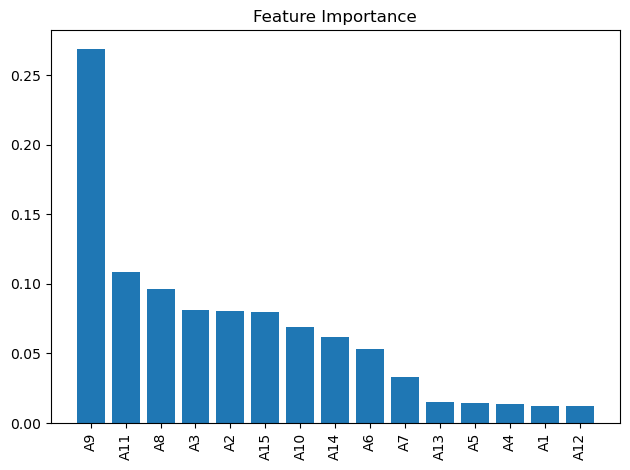

{'A9': 1, 'A11': 2, 'A8': 3, 'A3': 4, 'A2': 5, 'A15': 6, 'A10': 7, 'A14': 8, 'A6': 9, 'A7': 10, 'A13': 11, 'A5': 12, 'A4': 13, 'A1': 14, 'A12': 15}


In [27]:
# 2.1 Random Forest Feature Importances

from sklearn.ensemble import RandomForestClassifier

# Prepare feature matrix X and target vector y
X = df.drop('A16', axis=1)
y = df['A16']

# Initialize the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Visualize Feature Importances rank 
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# get the ranks
sorted_features = [X.columns[idx] for idx in sorted_indices]
ranks_importances = {feature: rank+1 for rank, feature in enumerate(sorted_features)}

print(ranks_importances)

In [28]:
# 2.2 Recursive Feature Elimination (RFE) with Logistic Regression

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model
rfe = RFE(estimator=logreg, n_features_to_select=5) 

# Fit RFE
rfe.fit(X, y)

# Summarize all features' selection
selected_features = pd.DataFrame({'Feature': list(X.columns), 'Ranking': rfe.ranking_})
selected_features_rfe = selected_features.sort_values(by='Ranking')

# Create a dictionary from the sorted DataFrame
ranks_rfe = dict(zip(selected_features_rfe['Feature'], selected_features_rfe['Ranking']))

print(ranks_rfe)

{'A5': 1, 'A9': 1, 'A10': 1, 'A11': 1, 'A13': 1, 'A12': 2, 'A8': 3, 'A4': 4, 'A15': 5, 'A7': 6, 'A1': 7, 'A6': 8, 'A2': 9, 'A3': 10, 'A14': 11}


In [29]:
# 2.3 L1 Regularization (Lasso) with Logistic Regression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with data standardization and logistic regression with L1 penalty
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l1', solver='liblinear'))
])

# Fit the pipeline
pipeline.fit(X, y)

# Get the coefficients from the logistic regression estimator
coefs = pipeline.named_steps['model'].coef_

# Get the non-zero coefficients' indices
non_zero_indices = np.where(coefs != 0)[1]

# Print out the features corresponding to the non-zero coefficients
selected_features = X.columns[non_zero_indices]
print("Selected features using L1 regularization:", selected_features)

# all of the features should keep based on the result, we will use the follow-up method to revise

Selected features using L1 regularization: Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15'],
      dtype='object')


In [30]:
# ---- follow-up: Using a smaller C for stronger regularization

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logistic.fit(X, y)

# Check the coefficients again
coefs = logistic.coef_
non_zero_indices = np.where(coefs != 0)[1]
selected_features_lasso = X.columns[non_zero_indices]

print("Selected features with stronger L1 regularization:", selected_features_lasso)
# 'A1', 'A6', 'A8', 'A9', 'A11', 'A12', 'A13', 'A14', 'A15' these variables can be hold bacuse of non-zero coefficients 

# print the lasso ranks
ranks = np.argsort(-np.abs(coefs[0]))
ranks_lasso = {X.columns[i]: rank+1 for rank, i in enumerate(ranks)}

print(ranks_lasso)

Selected features with stronger L1 regularization: Index(['A1', 'A6', 'A8', 'A9', 'A11', 'A12', 'A13', 'A14', 'A15'], dtype='object')
{'A9': 1, 'A11': 2, 'A13': 3, 'A8': 4, 'A1': 5, 'A15': 6, 'A6': 7, 'A12': 8, 'A14': 9, 'A2': 10, 'A3': 11, 'A4': 12, 'A5': 13, 'A7': 14, 'A10': 15}


# 3. use averaging rank to combine non-model-based and model-based

In [31]:
# combine all non-model-based analysis and model-based analysis to form a unique rank

import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Now create a DataFrame that compiles these ranks
ranks_df = pd.DataFrame({
    'Correlation': ranks_correlation,
    'ANOVA': ranks_anova,
    'ChiSquare': ranks_chi,
    'RandomForest': ranks_importances,
    'RFE': ranks_rfe,
    'Lasso': ranks_lasso
})

# Calculate the average rank across methods
ranks_df['Average Rank'] = ranks_df.mean(axis=1)

# Sort features by average rank
ranked_features = ranks_df.sort_values(by='Average Rank')
print(ranked_features)

# this unique ranked_features importance DataFrame now gives a combined ranking from all methods
# now, we use k-fold to iterate the model to get the best numbers of features

     Correlation  ANOVA  ChiSquare  RandomForest  RFE  Lasso  Average Rank
A11          1.0    4.0        NaN             2    1      2          2.00
A8           2.0    3.0        NaN             3    3      4          3.00
A9           NaN    NaN       10.0             1    1      1          3.25
A13          NaN    NaN        2.0            11    1      3          4.25
A15          3.0    5.0        NaN             6    5      6          5.00
A2           5.0    1.0        NaN             5    9     10          6.00
A3           4.0    2.0        NaN             4   10     11          6.20
A5           NaN    NaN        1.0            12    1     13          6.75
A6           NaN    NaN        5.0             9    8      7          7.25
A14          NaN    NaN        3.0             8   11      9          7.75
A10          NaN    NaN        9.0             7    1     15          8.00
A4           NaN    NaN        4.0            13    4     12          8.25
A12          NaN    NaN  

In [32]:
# this complex method, not only can ignore the less importance feature when i use all the non-model-based and model-based analysis, but also use k-fold to iterate the top features
# combination to consider the relationship between features.

# Phase 3: Model Implementation and Baseline Evaluation

## choose the number of top features we should use

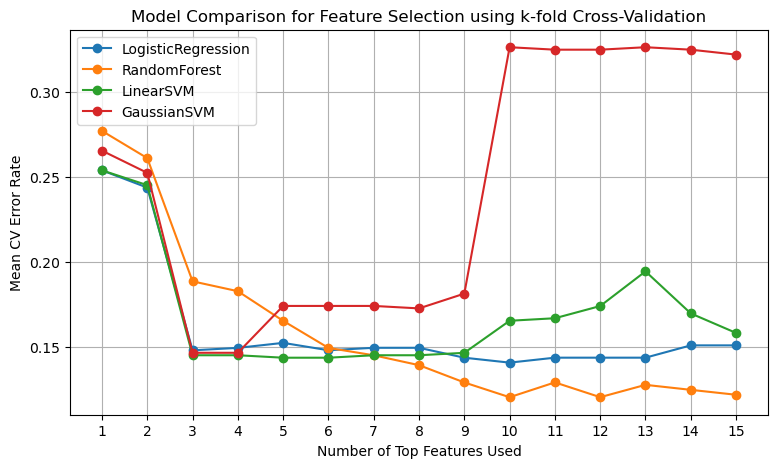

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Initialize the models
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'LinearSVM': LinearSVC(),
    'GaussianSVM': SVC(gamma='scale')
}

# Dictionary to store the mean cross-validated error rate for each model
mean_cv_error_rates = {name: [] for name in models}

# Sort the features based on 'Average Rank'
sorted_features = ranked_features.index.tolist()

# Iteratively add one feature at a time based on the rank
for i in range(1, len(sorted_features) + 1):
    # Select the top i features
    top_features = sorted_features[:i]
    
# Perform cross-validation for each model
    for name, model in models.items():
        cv_accuracy = cross_val_score(model, df[top_features], y, cv=cv, scoring='accuracy')
        # Error rate is 1 - accuracy
        cv_error_rate = 1 - cv_accuracy.mean()
        mean_cv_error_rates[name].append(cv_error_rate) 
        
# Plotting the results
plt.figure(figsize=(9, 5))
for name, error_rates in mean_cv_error_rates.items():
    plt.plot(range(1, len(sorted_features) + 1), error_rates, marker='o', label=name)

plt.title('Model Comparison for Feature Selection using k-fold Cross-Validation')
plt.xlabel('Number of Top Features Used')
plt.ylabel('Mean CV Error Rate')
plt.legend()
plt.grid(True)
plt.xticks(range(1, len(sorted_features) + 1))
plt.show()

# we choose top 11 features here because: -- choose elbow
# the error rate for SVM drops significantly and levels off around 11 features, for Logistic Regression and Random Forest, performance improves earlier and remains relatively stable. 

## model fitting

LogisticRegression accuracy: 0.8331 (+/- 0.0997)
LogisticRegression precision: 0.8070 (+/- 0.2234)
RandomForest accuracy: 0.8476 (+/- 0.1143)
RandomForest precision: 0.8144 (+/- 0.2364)
LinearSVM accuracy: 0.7880 (+/- 0.1033)
LinearSVM precision: 0.8022 (+/- 0.2533)
GaussianSVM accuracy: 0.6024 (+/- 0.0904)
GaussianSVM precision: 0.6933 (+/- 0.3422)


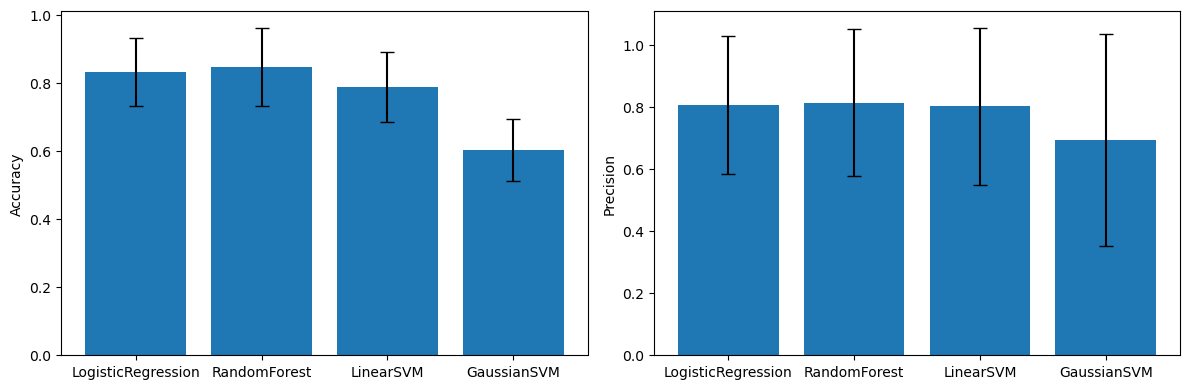

In [45]:
# model fitting without tuning hyperparameter using k-fold cross method, k = 3

from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Create the feature set using the top 11 features
top_features = sorted_features[:11]
X_top_features = df[top_features]

# Initialize models with default parameters
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'LinearSVM': LinearSVC(),
    'GaussianSVM': SVC()
}

# Dictionary to store model evaluation results
model_results_pre = {}

# Evaluate each model
for model_name, model in models.items():
    cv_scores_acc = cross_val_score(model, X_top_features, y, cv=3, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_top_features, y, cv=3, scoring='precision')
    
    model_results_pre[model_name] = {
        'accuracy': cv_scores_acc,
        'precision': cv_scores_prec
    }

    print(f"{model_name} accuracy: {cv_scores_acc.mean():.4f} (+/- {cv_scores_acc.std() * 2:.4f})")
    print(f"{model_name} precision: {cv_scores_prec.mean():.4f} (+/- {cv_scores_prec.std() * 2:.4f})")

# Plot the accuracy and precision results for each model
plt.figure(figsize=(12, 4))
plt.title('Model Comparison on Top 11 Features')

plt.subplot(1, 2, 1)
model_names = list(model_results.keys())
accuracies = [model_results_pre[name]['accuracy'].mean() for name in model_names]
acc_errors = [model_results_pre[name]['accuracy'].std() * 2 for name in model_names]
plt.bar(model_names, accuracies, yerr=acc_errors, capsize=5)
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
precisions = [model_results_pre[name]['precision'].mean() for name in model_names]
prec_errors = [model_results_pre[name]['precision'].std() * 2 for name in model_names]
plt.bar(model_names, precisions, yerr=prec_errors, capsize=5)
plt.ylabel('Precision')

plt.tight_layout()
plt.show()

# Phase 4: Hyperparameter Tuning

In [35]:
# use grid search to find the best hyperparameter

from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter grid
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
# Random Forest hyperparameter grid
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Linear SVM hyperparameter grid
linear_svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 10000]
}
# Gaussian SVM hyperparameter grid
Gaussian_svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Create a dictionary of models and their hyperparam grids
models_params = {
    'LogisticRegression': (LogisticRegression(solver='liblinear'), logreg_params),
    'RandomForest': (RandomForestClassifier(), rf_params),
    'LinearSVM': (LinearSVC(dual=False), linear_svm_params),
    'GaussianSVM': (SVC(), Gaussian_svm_params)
}

# Dictionary to store the best models and their scores
best_models = {}
best_scores = {}

# Perform Grid Search
for model_name, (model, params) in models_params.items():
    grid_search = GridSearchCV(model, params, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_top_features, y)
    
    # Store the best model and its score
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV score for {model_name}: {grid_search.best_score_:.4f}")

# Now best_models dictionary has the best models with their hyperparameters tuned.

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l1'}
Best CV score for LogisticRegression: 0.8447
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score for RandomForest: 0.8519
Best parameters for LinearSVM: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}
Best CV score for LinearSVM: 0.8520
Best parameters for GaussianSVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best CV score for GaussianSVM: 0.8432


LogisticRegression accuracy: 0.8360 (+/- 0.1210)
LogisticRegression precision: 0.8082 (+/- 0.2470)
RandomForest accuracy: 0.8403 (+/- 0.1086)
RandomForest precision: 0.8101 (+/- 0.2335)
LinearSVM accuracy: 0.8097 (+/- 0.1859)
LinearSVM precision: 0.6777 (+/- 0.0670)
GaussianSVM accuracy: 0.8127 (+/- 0.1337)
GaussianSVM precision: 0.7922 (+/- 0.1770)


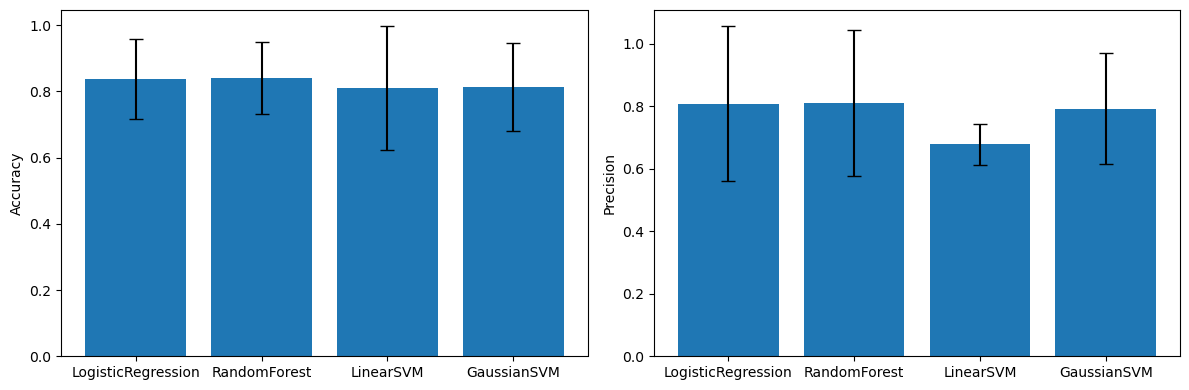

In [44]:
# Re-evaluate models with tuned hyperparameters

from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize models with tuned parameters
models = {
    'LogisticRegression': LogisticRegression(C = 10, penalty='l1',solver='liblinear'),
    'RandomForest': RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 100),
    'LinearSVM': LinearSVC(C = 1, loss = 'squared_hinge', max_iter = 1000),
    'GaussianSVM': SVC(C = 100, gamma = 0.001, kernel = 'rbf')
}

# Dictionary to store model evaluation results
model_results_post = {}

# Evaluate each model
for model_name, model in models.items():
    cv_scores_acc = cross_val_score(model, X_top_features, y, cv=3, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_top_features, y, cv=3, scoring='precision')
    
    model_results_post[model_name] = {
        'accuracy': cv_scores_acc,
        'precision': cv_scores_prec
    }

    print(f"{model_name} accuracy: {cv_scores_acc.mean():.4f} (+/- {cv_scores_acc.std() * 2:.4f})")
    print(f"{model_name} precision: {cv_scores_prec.mean():.4f} (+/- {cv_scores_prec.std() * 2:.4f})")

plt.figure(figsize=(12, 4))
plt.title('Model Comparison on Top 11 Features')

plt.subplot(1, 2, 1)
model_names = list(model_results_post.keys())
accuracies = [model_results_post[name]['accuracy'].mean() for name in model_names]
acc_errors = [model_results_post[name]['accuracy'].std() * 2 for name in model_names]
plt.bar(model_names, accuracies, yerr=acc_errors, capsize=5)
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
precisions = [model_results_post[name]['precision'].mean() for name in model_names]
prec_errors = [model_results_post[name]['precision'].std() * 2 for name in model_names]
plt.bar(model_names, precisions, yerr=prec_errors, capsize=5)
plt.ylabel('Precision')

plt.tight_layout()
plt.show()

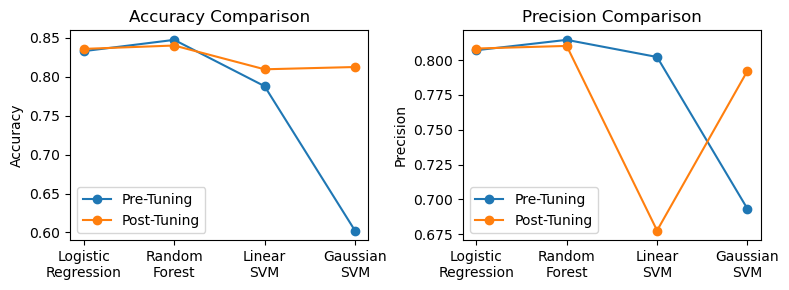

In [50]:
# compare the different results between pre_tuned and post_tuned

import matplotlib.pyplot as plt
import numpy as np

# Extract the accuracy and precision values for each model
pre_tuned_accuracy = [model_results_pre['LogisticRegression']['accuracy'].mean(),
                     model_results_pre['RandomForest']['accuracy'].mean(),
                     model_results_pre['LinearSVM']['accuracy'].mean(),
                     model_results_pre['GaussianSVM']['accuracy'].mean()]

pre_tuned_precision = [model_results_pre['LogisticRegression']['precision'].mean(),
                      model_results_pre['RandomForest']['precision'].mean(),
                      model_results_pre['LinearSVM']['precision'].mean(),
                      model_results_pre['GaussianSVM']['precision'].mean()]

post_tuned_accuracy = [model_results_post['LogisticRegression']['accuracy'].mean(),
                      model_results_post['RandomForest']['accuracy'].mean(),
                      model_results_post['LinearSVM']['accuracy'].mean(),
                      model_results_post['GaussianSVM']['accuracy'].mean()]

post_tuned_precision = [model_results_post['LogisticRegression']['precision'].mean(),
                       model_results_post['RandomForest']['precision'].mean(),
                       model_results_post['LinearSVM']['precision'].mean(),
                       model_results_post['GaussianSVM']['precision'].mean()]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot the accuracy changes
ax1.plot(np.arange(len(pre_tuned_accuracy)), pre_tuned_accuracy, marker='o', label='Pre-Tuning')
ax1.plot(np.arange(len(post_tuned_accuracy)), post_tuned_accuracy, marker='o', label='Post-Tuning')
ax1.set_xticks(np.arange(len(pre_tuned_accuracy)))
ax1.set_xticklabels(['Logistic\nRegression', 'Random\nForest', 'Linear\nSVM', 'Gaussian\nSVM'])
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.legend()

# Plot the precision changes
ax2.plot(np.arange(len(pre_tuned_precision)), pre_tuned_precision, marker='o', label='Pre-Tuning')
ax2.plot(np.arange(len(post_tuned_precision)), post_tuned_precision, marker='o', label='Post-Tuning')
ax2.set_xticks(np.arange(len(pre_tuned_precision)))
ax2.set_xticklabels(['Logistic\nRegression', 'Random\nForest', 'Linear\nSVM', 'Gaussian\nSVM'])
ax2.set_ylabel('Precision')
ax2.set_title('Precision Comparison')
ax2.legend()

plt.tight_layout()
plt.show()

# Phase 5: Model Evaluation and Comparative Analysis

In [37]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

for model_name, model in models.items():
    cv_scores_acc = cross_val_score(model, X_top_features, y, cv=3, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_top_features, y, cv=3, scoring='precision')
    cv_scores_recall = cross_val_score(model, X_top_features, y, cv=3, scoring='recall')
    cv_scores_f1 = cross_val_score(model, X_top_features, y, cv=3, scoring='f1')
    cv_scores_roc_auc = cross_val_score(model, X_top_features, y, cv=3, scoring='roc_auc')

    model_results[model_name] = {
        'accuracy': cv_scores_acc,
        'precision': cv_scores_prec,
        'recall': cv_scores_recall,
        'f1': cv_scores_f1,
        'roc_auc': cv_scores_roc_auc
    }

    # Print the model evaluation results
    print(f"{model_name} accuracy: {cv_scores_acc.mean():.4f} (+/- {cv_scores_acc.std() * 2:.4f})")
    print(f"{model_name} precision: {cv_scores_prec.mean():.4f} (+/- {cv_scores_prec.std() * 2:.4f})")
    print(f"{model_name} recall: {cv_scores_recall.mean():.4f} (+/- {cv_scores_recall.std() * 2:.4f})")
    print(f"{model_name} f1: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std() * 2:.4f})")
    print(f"{model_name} roc_auc: {cv_scores_roc_auc.mean():.4f} (+/- {cv_scores_roc_auc.std() * 2:.4f})")

LogisticRegression accuracy: 0.8360 (+/- 0.1210)
LogisticRegression precision: 0.8082 (+/- 0.2470)
LogisticRegression recall: 0.8725 (+/- 0.1109)
LogisticRegression f1: 0.8301 (+/- 0.0948)
LogisticRegression roc_auc: 0.9053 (+/- 0.0922)
RandomForest accuracy: 0.8360 (+/- 0.1203)
RandomForest precision: 0.8140 (+/- 0.2218)
RandomForest recall: 0.8562 (+/- 0.1223)
RandomForest f1: 0.8423 (+/- 0.1085)
RandomForest roc_auc: 0.9060 (+/- 0.0736)
LinearSVM accuracy: 0.8113 (+/- 0.0824)
LinearSVM precision: 0.7860 (+/- 0.2315)
LinearSVM recall: 0.6471 (+/- 0.4305)
LinearSVM f1: 0.8113 (+/- 0.1424)
LinearSVM roc_auc: 0.8847 (+/- 0.0173)
GaussianSVM accuracy: 0.8127 (+/- 0.1337)
GaussianSVM precision: 0.7922 (+/- 0.1770)
GaussianSVM recall: 0.8039 (+/- 0.2814)
GaussianSVM f1: 0.7888 (+/- 0.1706)
GaussianSVM roc_auc: 0.8425 (+/- 0.2090)


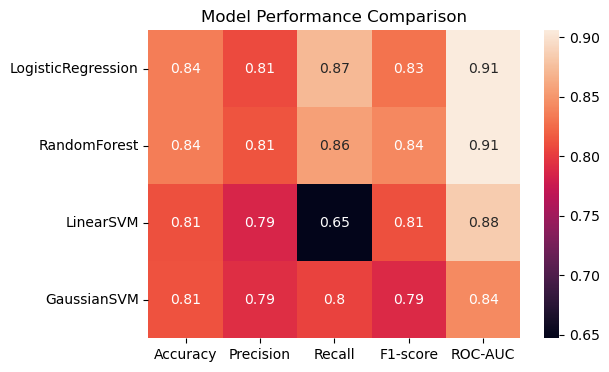

In [63]:
# heatmap show the result

import seaborn as sns

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    [[model_results[model_name][metric].mean() for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']] 
     for model_name in model_results],
    annot=True, 
    xticklabels=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    yticklabels=list(model_results.keys())
)
plt.title('Model Performance Comparison')
plt.show()

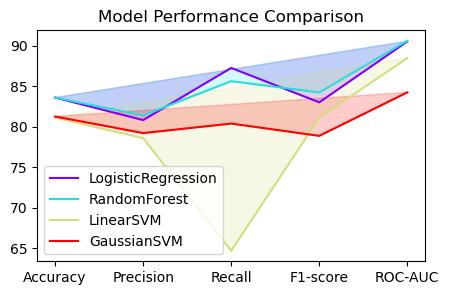

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(5, 3))

# Number of evaluation metrics
num_metrics = 5

# Get the model names
model_names = list(model_results.keys())

# Create a color palette
colors = plt.cm.rainbow(np.linspace(0, 1, len(model_names)))

# Plot the radar chart
for i, model_name in enumerate(model_names):
    # Get the metric values for the current model
    metric_values = [model_results[model_name][metric].mean() for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
    
    # Adjust the metric values to fit the radar chart
    metric_values = [v * 100 for v in metric_values]  # Scale the values to 0-100
    
    # Plot the radar chart for the current model
    ax.plot(np.linspace(0, 2 * np.pi, num_metrics, endpoint=False), metric_values, color=colors[i], label=model_name)
    ax.fill(np.linspace(0, 2 * np.pi, num_metrics, endpoint=False), metric_values, alpha=0.2, color=colors[i])

ax.set_xticks(np.linspace(0, 2 * np.pi, num_metrics, endpoint=False))
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])
ax.set_title('Model Performance Comparison')
ax.legend()
plt.show()

# radar chart is a useful way to visualize multi-dimensional data, where each axis represents an evaluation metric